In [3]:
import numpy as np
import matplotlib.pyplot as mpl
from core.Current_functions import *
from core.Parameters import *
from scipy.optimize import root, least_squares


# At rest

## Estimating the conductances

In [107]:
gamma_l=Fgamma_l(Krest,Ki,Nrest,Ni)
gamma_h=Fgamma_h(Eh,Krest,Ki,Nrest,Ni)
print(gamma_h)


2.1961122941420235


In [130]:

def equations(vars):
    Gk_s,Gk_e,Gh_s,Gh_e,Gl,Imax_s,Imax_e,Ks=vars

    I_s=I_KIR(R,T,F,Gk_s,El,Ks,Ki)+ sum(I_H(P_h(a,b,c,El,V_half),Gh_s,El,gamma_h,Ks,Ki,Ni,Nrest))+sum(ATPase(Imax_s,KmK,KmNa,Ks,Ni))+sum(gap_j_leak(El,gamma_l,Gl,Ks,Ki,Nrest,Ni))
    I_e=I_KIR(R,T,F,Gk_e,El,Krest,Ki)+ sum(I_H(P_h(a,b,c,El,V_half),Gh_s,El,gamma_h,Krest,Ki,Nrest,Ni))+sum(ATPase(Imax_e,KmK,KmNa,Krest,Ni))
    eq1=I_s+I_e #Somme des courants nuls

    eq2=Gi(Gm,Gp,Gg,Ga,n_internode)-(Gk_e+Gk_s)*P_k(R,T,F,El,Krest,Ki)-(Gh_e+Gh_s)*P_h(a,b,c,El,V_half)-Gl#Somme des conductances

    eq3=Gk-Gk_s-Gk_e #Utilisation de la valeur expérimentale de Gk
    eq4=Gh-Gh_e-Gh_s #Utilisation de la valeur expérimentale de Gh

    Itot_k=I_KIR(R,T,F,Gk_e,El,Krest,Ki)+I_KIR(R,T,F,Gk_s,El,Ks,Ki)+ I_H(P_h(a,b,c,El,V_half),Gh_e,El,gamma_h,Krest,Ki,Nrest,Ni)[0]+I_H(P_h(a,b,c,El,V_half),Gh_s,El,gamma_h,Ks,Ki,Nrest,Ni)[0]+ATPase(Imax_s,KmK,KmNa,Krest,Ni)[0]+ATPase(Imax_e,KmK,KmNa,Ks,Ni)[0]+gap_j_leak(El,gamma_l,Gl,Ks,Ki,Nrest,Ni)[0] #Courant potassique total

    Itot_na=I_H(P_h(a,b,c,El,V_half),Gh_s,El,gamma_h,Ks,Ki,Nrest,Ni)[1]+I_H(P_h(a,b,c,El,V_half),Gh_e,El,gamma_h,Krest,Ki,Nrest,Ni)[1]+gap_j_leak(El,gamma_l,Gl,Ks,Ki,Nrest,Ni)[1]+ATPase(Imax_s,KmK,KmNa,Krest,Ni)[1]+ATPase(Imax_e,KmK,KmNa,Ks,Ni)[1] #Courant Na+ total

    eq5=Itot_k*dt/(V_myelin*F) #Pas de variation de concentration en K+

    eq6=Itot_na*dt/(V_myelin*F)#Pas de variation de concentration en Na+

    GK_tot_s= (I_KIR(R,T,F,Gk_s,El,Ks,Ki)+I_H(P_h(a,b,c,El,V_half),Gh_s,El,gamma_h,Ks,Ki,Nrest,Ni)[0]+gap_j_leak(El,gamma_l,Gl,Ks,Ki,Nrest,Ni)[0])/(El-E(R,T,F,Ks,Ki))
    GK_tot_e= (I_KIR(R,T,F,Gk_e,El,Krest,Ki)+I_H(P_h(a,b,c,El,V_half),Gh_e,El,gamma_h,Krest,Ki,Nrest,Ni)[0])/(El-E(R,T,F,Krest,Ki))
    GNa_tot= abs(Itot_na/(El-E(R,T,F,Nrest,Ni)))

    PK_s=GK_tot_s*R*T/(Ks*F**2)
    PK_e=GK_tot_e*R*T/(Krest*F**2)
    PNA=GNa_tot*R*T/(Nrest*F**2)
    eq7=El-(R*T/F)*np.log((PK_s*Ks+PK_e*Krest+PNA*Nrest)/((PK_s+PK_e)*Ki+PNA*Ni)) #Potentiel de repos égal à Vrest(El)

    eq8=Krest-Ks-diffK(D,l_paranode,S_section_submyelin,V_submyelin,Ks,Krest)*dt

    return [eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8]





initial_guess = [1e-11,1e-11,1e-11,1e-11,1e-11,1e-11,1e-11,1e-3]
solution = root(
    equations,
    initial_guess,
    tol=1e-16
)
Gk_s,Gk_e,Gh_s,Gh_e,Gl,Imax_s,Imax_e,Ks  = solution.x

In [131]:
print(solution.x)

[-5.22865693e-05  5.23305179e-05 -3.60424350e-07  3.60881842e-07
  5.94118107e-10  9.18990383e-08 -9.69949039e-08  3.33791418e-03]


In [88]:
def equations(vars):
    Gk_e,Gh_e,Imax_e=vars
    I_e=I_KIR(R,T,F,Gk_e,El,Krest,Ki)+ sum(I_H(P_h(a,b,c,El,V_half),Gh_e,El,gamma_h,Krest,Ki,Nrest,Ni))+sum(ATPase(Imax_e,KmK,KmNa,Krest,Ni))
    eq1=I_e

    Itot_k=I_KIR(R,T,F,Gk_e,El,Krest,Ki)+ I_H(P_h(a,b,c,El,V_half),Gh_e,El,gamma_h,Krest,Ki,Nrest,Ni)[0]+ATPase(Imax_e,KmK,KmNa,Krest,Ni)[0]

    Itot_na=I_H(P_h(a,b,c,El,V_half),Gh_e,El,gamma_h,Krest,Ki,Nrest,Ni)[1]
    print(Itot_k,Itot_na)

    eq2=Itot_k/(V_myelin*F)

    GK_tot= (Itot_k-ATPase(Imax_e,KmK,KmNa,Krest,Ni)[0])/(El-E(R,T,F,Krest,Ki))
    GNa_tot= Itot_na/(El-E(R,T,F,Nrest,Ni))
    PK_e=GK_tot*R*T/(Krest*F**2)
    PNA=GNa_tot*R*T/(Nrest*F**2)

    eq3=El-(R*T/F)*np.log((PK_e*Krest+PNA*Nrest)/((PK_e)*Ki+PNA*Ni))



    return [eq1,eq2,eq3]


initial_guess = [1e-11,1e-11,1e-11]
solution = root(
    equations,
    initial_guess,
    tol=1e-16
)
Gk_e,Gh_e,Imax_e  = solution.x

-3.4753870243420926e-12 -7.550795865735112e-14
-3.4753870243420926e-12 -7.550795865735112e-14
-3.4753870243420926e-12 -7.550795865735112e-14
-3.4753870243396563e-12 -7.550795865735112e-14
-3.4753870242222048e-12 -7.550795978250738e-14
-3.4753870762517187e-12 -7.550795865735112e-14
-2.509718137125844e-20 -8.505479151998585e-17
-3.3291732487684786e-12 -7.355847021927954e-14
-3.4753870243396563e-12 -7.550795865735112e-14
-3.4753870242222048e-12 -7.550795978250738e-14
-3.4753870762517187e-12 -7.550795865735112e-14
-2.509718137125844e-20 -8.505479151998585e-17
-3.3291732487684786e-12 -7.355847021927954e-14
-3.410055642148132e-12 -7.42858884034017e-14
-3.34928346199061e-12 -7.314005855188853e-14
-2.9461982215351867e-12 -6.413918895999741e-14
-1.8592483315319e-12 -3.9303735037494455e-14
-2.191851952523016e-12 -4.685704215796339e-14
-2.9461982215336874e-12 -6.413918895999741e-14
-2.9461982214333494e-12 -6.413918991574579e-14
-2.9461982655372993e-12 -6.413918895999741e-14
-2.5799598290043468e-1

In [89]:
print(solution.x)

[3.29655763e-19 2.55220928e-19 6.04916711e-22]


In [124]:
def equations(vars):
    Gk_s,,Imax_s,Gl=vars
    I_s=I_KIR(R,T,F,Gk_s,El,Krest,Ki)+ sum(I_H(P_h(a,b,c,El,V_half),Gh_s,El,gamma_h,Krest,Ki,Nrest,Ni))+sum(ATPase(Imax_s,KmK,KmNa,Krest,Ni))+sum(gap_j_leak(El,gamma_l,Gl,Krest,Ki,Nrest,Ni))
    eq1=I_s

    Itot_k=I_KIR(R,T,F,Gk_s,El,Krest,Ki)+ I_H(P_h(a,b,c,El,V_half),Gh_s,El,gamma_h,Krest,Ki,Nrest,Ni)[0]+ATPase(Imax_s,KmK,KmNa,Krest,Ni)[0]+gap_j_leak(El,gamma_l,Gl,Krest,Ki,Nrest,Ni)[0]

    Itot_na=I_H(P_h(a,b,c,El,V_half),Gh_e,El,gamma_h,Krest,Ki,Nrest,Ni)[1]+gap_j_leak(El,gamma_l,Gl,Krest,Ki,Nrest,Ni)[1]
    print(Itot_k,Itot_na)

    eq2=Itot_k/(V_myelin*F)

    GK_tot= (Itot_k-ATPase(Imax_s,KmK,KmNa,Krest,Ni)[0])/(El-E(R,T,F,Krest,Ki))
    GNa_tot= Itot_na/(El-E(R,T,F,Nrest,Ni))
    PK_e=GK_tot*R*T/(Krest*F**2)
    PNA=GNa_tot*R*T/(Nrest*F**2)

    eq3=El-(R*T/F)*np.log((PK_e*Krest+PNA*Nrest)/((PK_e)*Ki+PNA*Ni))


    eq5=Gh-Gh_s-Gh_s


    return [eq1,eq2,eq3,eq5]


initial_guess = [1e-11,1e-11,1e-11,1e-11]
solution = root(
    equations,
    initial_guess,
    tol=1e-16
)
Gk_s,Gh_s,Imax_s,Gl  = solution.x

-3.4224837272433646e-12 -4.567488496114522e-12
-3.4224837272433646e-12 -4.567488496114522e-12
-3.4224837272433646e-12 -4.567488496114522e-12
-3.4224837272409283e-12 -4.567488496114522e-12
-3.4224837271234767e-12 -4.567488496114522e-12
-3.4224837791529907e-12 -4.567488496114522e-12
-3.422483726455044e-12 -4.567488509717841e-12
1.5253784675523869e-18 -2.0037880083227152e-12
1.1031420192064206e-18 -2.0319729748795717e-12
6.599925877441073e-26 -2.1170630049660915e-12
-1.4691745498836124e-26 -2.1599577488890604e-12
2.524354896707238e-29 -2.1814875353052782e-12
-2.524354896707238e-29 -2.1855453519683553e-12
2.524354896707238e-29 -2.185814823118077e-12
1.262177448353619e-29 -2.185817687904222e-12
-2.524354896707238e-29 -2.1858176898018873e-12
-3.7865323450608567e-29 -2.185817689801901e-12
6.310887241768094e-29 -2.185817689801901e-12
-8.835242138475332e-29 -2.185817689801901e-12


In [125]:
print(solution.x)

[ 7.91657428e-09  2.42000000e-10  6.86120673e-13 -1.60889715e-11]


## Looking at evolution of K+ concentration and current

In [96]:
submyelinK = np.full(len(times), Krest)
myelinK = np.full(len(times), Ki)
I=np.full(len(times),0.0)
IKIR=np.full(len(times),0.0)
IHCN=np.full(len(times),0.0)
IATP=np.full(len(times),0.0)
IL=np.full(len(times),0.0)

In [99]:
for i in range(len(times)-1):
     #on aligne la concentration au pas de temps précedent
    myelinK[i+1]=myelinK[i]
    submyelinK[i+1]=submyelinK[i]
    #Les courants

    atpase_current=ATPase(Imax_e,KmK,KmNa,submyelinK[i],Ni)
    IATP[i]=sum(atpase_current)

    ikir= I_KIR(R,T,F,Gk_e,El,submyelinK[i],myelinK[i])
    IKIR[i]=ikir
    ihcn= I_H(P_h(a,b,c,El,V_half),Gh_e,El,gamma_h,submyelinK[i],myelinK[i],Nrest,Ni)
    IHCN[i]=sum(ihcn)

  #  ileak= gap_j_leak(El,gamma_l,Gl,submyelinK[i],myelinK[i],Ni,Nrest)
  #  IL[i]=sum(ileak)

    I[i]= sum(atpase_current)+ikir+sum(ihcn)#+sum(ileak)

   #Les concentrations K+
    atpase_current_K=atpase_current[1]
    myelinK[i+1] -=  atpase_current_K*dt/(F*V_myelin)
    submyelinK[i+1]+=atpase_current_K*dt/(F*V_submyelin)

    myelinK[i+1]-= ikir * dt / (V_myelin * F)
    submyelinK[i+1]+= ikir * dt / (V_submyelin * F)

    ihcn_k= ihcn[0]
    myelinK[i+1]-= ihcn_k* dt / (V_myelin * F)
    submyelinK[i+1]+= ihcn_k* dt / (V_submyelin * F)

    #ileak_k=ileak[0]
   # myelinK[i+1]-= ileak_k* dt / (V_myelin * F)
   # submyelinK[i+1]+= ileak_k* dt / (V_submyelin * F)




In [103]:
ATPase(Imax,KmK,KmNa,Krest,Ni)

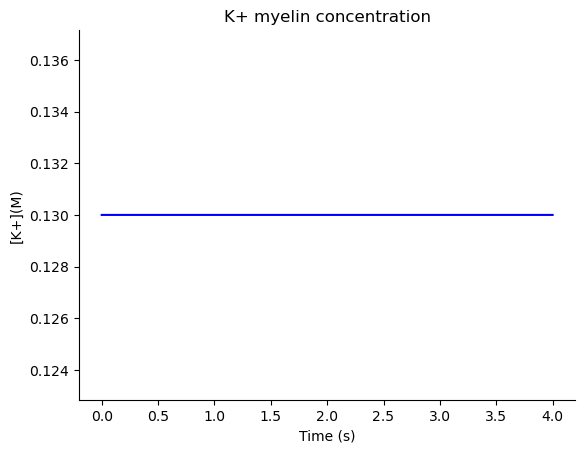

In [100]:
fig,ax=mpl.subplots()
mpl.plot(times, myelinK,color='blue')
ax.set_xlabel("Time (s)")
ax.set_ylabel("[K+](M)")
mpl.title("K+ myelin concentration")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
mpl.show()

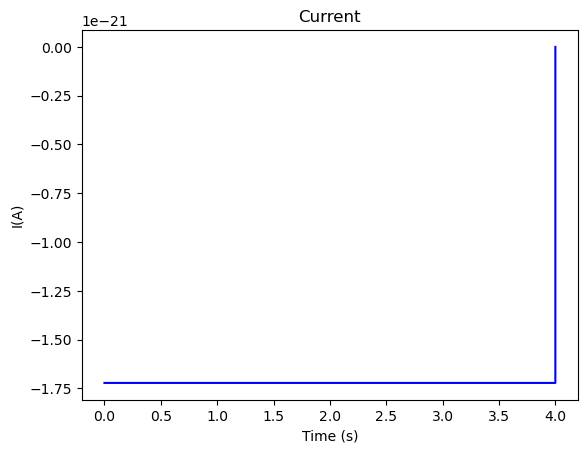

In [101]:
fig,ax=mpl.subplots()
mpl.plot(times, IHCN,color='blue')
ax.set_xlabel("Time (s)")
ax.set_ylabel("I(A)")
mpl.title("Current")
mpl.show()

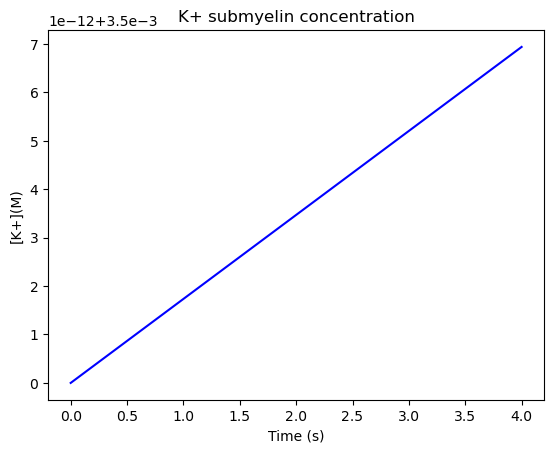

In [102]:
fig,ax=mpl.subplots()
mpl.plot(times, submyelinK,color='blue')
ax.set_xlabel("Time (s)")
ax.set_ylabel("[K+](M)")
mpl.title("K+ submyelin concentration")
mpl.show()

In [6]:
submyelinK = np.full(len(times), Krest)
myelinK = np.full(len(times), Ki)
extK = np.full(len(times),Krest)
atpase_current_K=np.full(len(times),0.)
IKIR_s=np.full(len(times),0.0)
IHCN_s=np.full(len(times),0.0)
IATP_s=np.full(len(times),0.0)

IKIR_e=np.full(len(times),0.0)
IHCN_e=np.full(len(times),0.0)
IATP_e=np.full(len(times),0.0)

EK_s=np.full(len(times),0.)
EK_e=np.full(len(times),0.)

V=np.full(len(times),El)

In [8]:
for i in range(len(times)-1):

    submyelinK[i+1]=submyelinK[i] #on aligne la concentration au pas de temps précedent
    myelinK[i+1]=myelinK[i]

    #AP efflux

    if sum(APtimes < (times[i] - dt)) < sum(APtimes < times[i]):  #meaning that the t+dt is reaching the timing of a new AP
        submyelinK[i + 1] += APefflux  # addition of K+ efflux from the neuronal activity


    #interface submyelin

     #Les courants
    atpase_current=ATPase(Imax/20,KmK,KmNa,submyelinK[i],Ni)
    IATP_s[i]=sum(atpase_current)

    ikir= I_KIR(R,T,F,Gk/20,V[i],submyelinK[i],myelinK[i])
    IKIR_s[i]=ikir
    ihcn= I_H(P_openH(a,b,c,V[i],V_half),Gh/20,V[i],gamma,submyelinK[i],myelinK[i])
    IHCN_s[i]=sum(ihcn)


   #Les concentrations K+
    atpase_current_K=atpase_current[1]
    myelinK[i+1] -=  atpase_current_K*dt/(F*V_myelin)
    submyelinK[i+1]+=atpase_current_K*dt/(F*V_submyelin)

    myelinK[i+1]-= ikir * dt / (V_myelin * F)
    submyelinK[i+1]+= ikir * dt / (V_submyelin * F)

    ihcn_k= ihcn[0]
    myelinK[i+1]-= ihcn_k* dt / (V_myelin * F)
    submyelinK[i+1]+= ihcn_k* dt / (V_submyelin * F)

    EK_s[i]=E(R,T,F,submyelinK[i],myelinK[i])
    EK_e[i]=E(R,T,F,Krest,myelinK[i])

  #  V[i + 1] = V[i] + dt / Cm * ( - IKIR_s[i] - IHCN_s[i]-IATP_s[i])




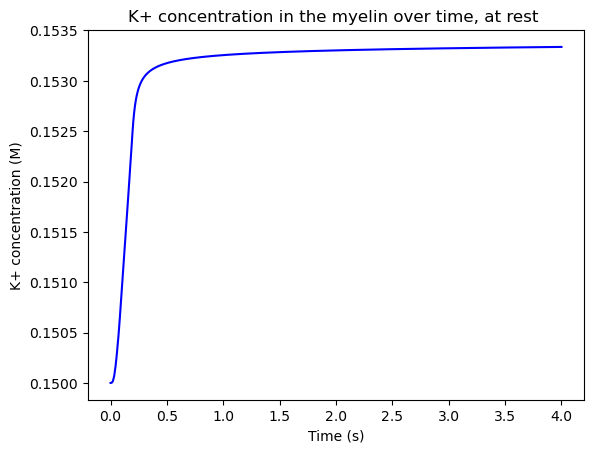

In [9]:

fig,ax=mpl.subplots()
mpl.plot(times, myelinK,color='blue')
ax.set_xlabel("Time (s)")
ax.set_ylabel("K+ concentration (M)")
mpl.title("K+ concentration in the myelin over time, at rest ")
mpl.show()


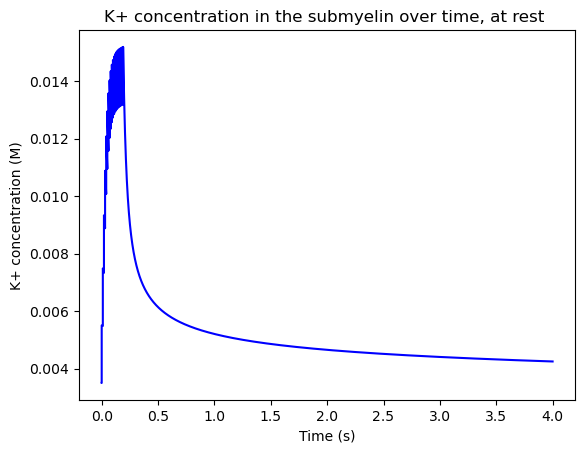

In [10]:
fig,ax=mpl.subplots()
mpl.plot(times, submyelinK,color='blue')
ax.set_xlabel("Time (s)")
ax.set_ylabel("K+ concentration (M)")
mpl.title("K+ concentration in the submyelin over time, at rest ")
mpl.show()

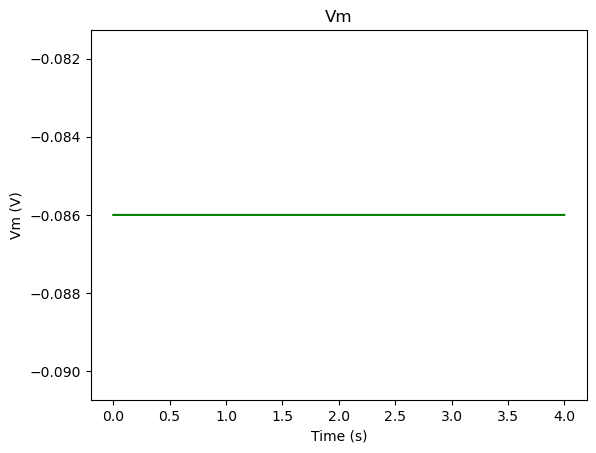

In [11]:

fig,ax=mpl.subplots()
mpl.plot(times, V,color='green')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vm (V)")
mpl.title("Vm")
mpl.show()


In [12]:
for i in range(len(times)-1):

    submyelinK[i+1]=submyelinK[i] #on aligne la concentration au pas de temps précedent
    myelinK[i+1]=myelinK[i]

    #AP efflux

    if sum(APtimes < (times[i] - dt)) < sum(APtimes < times[i]):  #meaning that the t+dt is reaching the timing of a new AP
        submyelinK[i + 1] += APefflux  # addition of K+ efflux from the neuronal activity


    #interface submyelin

     #Les courants
    atpase_current=ATPase(Imax/20,KmK,KmNa,submyelinK[i],Ni)
    IATP_s[i]=sum(atpase_current)

    ikir= I_KIR(R,T,F,Gk/20,V[i],submyelinK[i],myelinK[i])
    IKIR_s[i]=ikir
    ihcn= I_H(P_openH(a,b,c,V[i],V_half),Gh/20,V[i],gamma,submyelinK[i],myelinK[i])
    IHCN_s[i]=sum(ihcn)


   #Les concentrations K+
    atpase_current_K=atpase_current[1]
    myelinK[i+1] -=  atpase_current_K*dt/(F*V_myelin)
    submyelinK[i+1]+=atpase_current_K*dt/(F*V_submyelin)

    myelinK[i+1]-= ikir * dt / (V_myelin * F)
    submyelinK[i+1]+= ikir * dt / (V_submyelin * F)

    ihcn_k= ihcn[0]
    myelinK[i+1]-= ihcn_k* dt / (V_myelin * F)
    submyelinK[i+1]+= ihcn_k* dt / (V_submyelin * F)



    #interface ext

     #Les courants
    atpase_current=ATPase(Imax/20,KmK,KmNa,Krest,Ni)
    IATP_e[i]=sum(atpase_current)

    ikir= I_KIR(R,T,F,Gk/20,V[i],Krest,myelinK[i])
    IKIR_e[i]=ikir
    ihcn= I_H(P_openH(a,b,c,V[i],V_half),Gh/20,V[i],gamma,Krest,myelinK[i])
    IHCN_e[i]=sum(ihcn)


   #Les concentrations K+
    atpase_current_K=atpase_current[1]
    myelinK[i+1] -=  atpase_current_K*dt/(F*V_myelin)

    myelinK[i+1]-= ikir * dt / (V_myelin * F)

    ihcn_k= ihcn[0]
    myelinK[i+1]-= ihcn_k* dt / (V_myelin * F)


    # Axonal K+ uptake

    #axon_atpasecurrent=ATPase(Imax_a,KmK,KmNa,submyelinK[i],Ni)
    #submyelinK[i+1]+=axon_atpasecurrent[1]*dt/(F*V_submyelin)

    #Radial diffusion
    submyelinK[i+1]+= dt*diffK(D,l_paranode,S_section_submyelin,V_submyelin, submyelinK[i], Krest)

    #Voltage

    V[i + 1] = V[i] + dt / Cm * ( - IKIR_s[i] - IHCN_s[i]-IATP_s[i]-IKIR_e[i] - IHCN_e[i]-IATP_e[i])



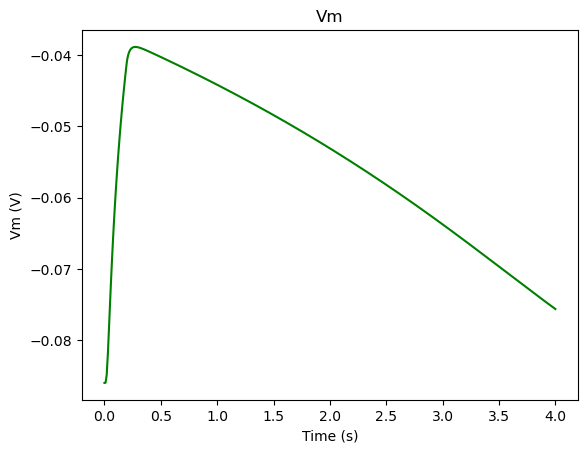

In [13]:
fig,ax=mpl.subplots()
mpl.plot(times, V,color='green')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vm (V)")
mpl.title("Vm")
mpl.show()

In [27]:
fig,ax=mpl.subplots()
mpl.plot(times, IHCN_e,color='red',label="external interface")
mpl.plot(times, IHCN_s,color='darkred', label='submyelin interface')
ax.set_xlabel("Time (s)")
ax.set_ylabel("I (A)")
mpl.title("HCN current  over time ")
mpl.legend()
mpl.show()

/Users/lounaschaison/miniforge3/envs/basepython/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

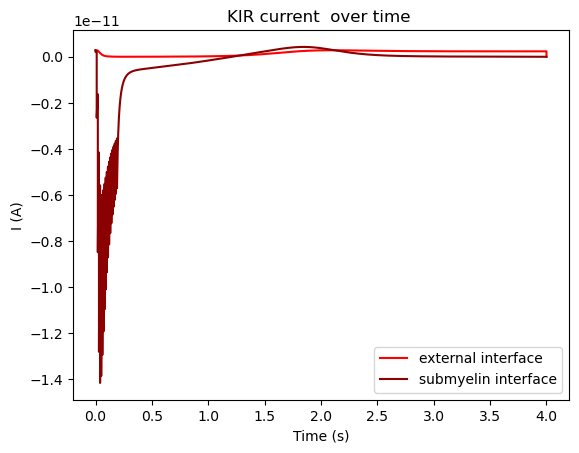

In [28]:
fig,ax=mpl.subplots()
mpl.plot(times, IKIR_e,color='red',label="external interface")
mpl.plot(times, IKIR_s,color='darkred', label='submyelin interface')
ax.set_xlabel("Time (s)")
ax.set_ylabel("I (A)")
mpl.title("KIR current  over time ")
mpl.legend()
mpl.show()

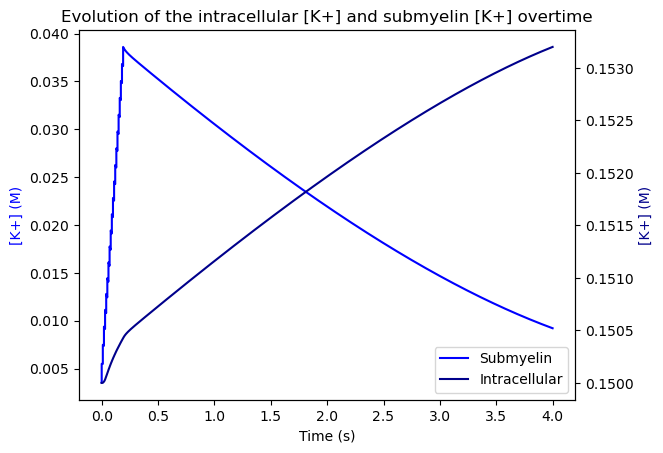

In [14]:

fig, ax1 = mpl.subplots()

line1 = ax1.plot(times, submyelinK, color='blue', label="Submyelin")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("[K+] (M)",color='blue')
ax2 = ax1.twinx()
line2 = ax2.plot(times, myelinK, color='darkblue', label="Intracellular")
ax2.set_ylabel("[K+] (M)",color='darkblue')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

mpl.title("Evolution of the intracellular [K+] and submyelin [K+] overtime")

mpl.show()

## Taking into account the connection with astoryctes and oligo through gap junctions

In [ ]:
for i in range(len(times)-1):

    submyelinK[i+1]=submyelinK[i] #on aligne la concentration au pas de temps précedent
    myelinK[i+1]=myelinK[i]

    #AP efflux

    if sum(APtimes < (times[i] - dt)) < sum(APtimes < times[i]):  #meaning that the t+dt is reaching the timing of a new AP
        submyelinK[i + 1] += APefflux  # addition of K+ efflux from the neuronal activity


    #interface submyelin

     #Les courants
    atpase_current=ATPase(Imax/20,KmK,KmNa,submyelinK[i],Ni)
    IATP_s[i]=sum(atpase_current)

    ikir= I_KIR(R,T,F,Gk/20,V[i],submyelinK[i],myelinK[i])
    IKIR_s[i]=ikir
    ihcn= I_H(P_openH(a,b,c,V[i],V_half),Gh/20,V[i],gamma,submyelinK[i],myelinK[i])
    IHCN_s[i]=sum(ihcn)


   #Les concentrations K+
    atpase_current_K=atpase_current[1]
    myelinK[i+1] -=  atpase_current_K*dt/(F*V_myelin)
    submyelinK[i+1]+=atpase_current_K*dt/(F*V_submyelin)

    myelinK[i+1]-= ikir * dt / (V_myelin * F)
    submyelinK[i+1]+= ikir * dt / (V_submyelin * F)

    ihcn_k= ihcn[0]
    myelinK[i+1]-= ihcn_k* dt / (V_myelin * F)
    submyelinK[i+1]+= ihcn_k* dt / (V_submyelin * F)



    #interface ext

     #Les courants
    atpase_current=ATPase(Imax/20,KmK,KmNa,Krest,Ni)
    IATP_e[i]=sum(atpase_current)

    ikir= I_KIR(R,T,F,Gk/20,V[i],Krest,myelinK[i])
    IKIR_e[i]=ikir
    ihcn= I_H(P_openH(a,b,c,V[i],V_half),Gh/20,V[i],gamma,Krest,myelinK[i])
    IHCN_e[i]=sum(ihcn)


   #Les concentrations K+
    atpase_current_K=atpase_current[1]
    myelinK[i+1] -=  atpase_current_K*dt/(F*V_myelin)

    myelinK[i+1]-= ikir * dt / (V_myelin * F)

    ihcn_k= ihcn[0]
    myelinK[i+1]-= ihcn_k* dt / (V_myelin * F)


    # GAP junctions
    Ig=gap_j(R,T,F,myelinK[i],V[i],Gg,El,Ki)
    myelinK[i+1]+=  Ig* dt / (V_myelin * F)


    V[i + 1] = V[i] + dt / Cm * ( - IKIR_s[i] - IHCN_s[i]-IATP_s[i]-IKIR_e[i] - IHCN_e[i]-IATP_e[i])


/var/folders/1p/_vl7gjxs3597kgq9c69yxz0h0000gn/T/ipykernel_11811/659603085.py:63: RuntimeWarning: invalid value encountered in scalar divide
  return Gg*(V-El)/(np.exp(F*(V-El)/(R*T))-1)*(myelinK-Ki*np.exp(F*(V-El)/(R*T)))


In [30]:
gap_j(R,T,F,Krest,-0.04,Gg,El,Ki)

np.float64(-4.503387588297705e-12)